# Fourier Series


This notebook visualizes the Fourier series approximation of a square wave function with period \( T = 2\pi \). The square wave is defined as:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 14,            # base font size
    'axes.titlesize': 16,       # subplot title
    'axes.labelsize': 14,       # x/y axis labels
    'xtick.labelsize': 12,      # x tick labels
    'ytick.labelsize': 12,      # y tick labels
    'legend.fontsize': 12,      # legend
})


## Example: Window function

$$\begin{align}
f(t) & = \begin{cases} 1 & -T/2 < t < T/2 \\
                        0 & \text{else}
        \end{cases} \\
f(t+T) & = f(t)
\end{align}
$$

<>:52: SyntaxWarning: invalid escape sequence '\c'
<>:52: SyntaxWarning: invalid escape sequence '\c'
/var/folders/2y/kd_y0jvx5tn8ln5xjpbct0680000gn/T/ipykernel_96926/472653879.py:52: SyntaxWarning: invalid escape sequence '\c'
  axs[1].set_ylabel('$a_n\cos n\omega t$')
/var/folders/2y/kd_y0jvx5tn8ln5xjpbct0680000gn/T/ipykernel_96926/472653879.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


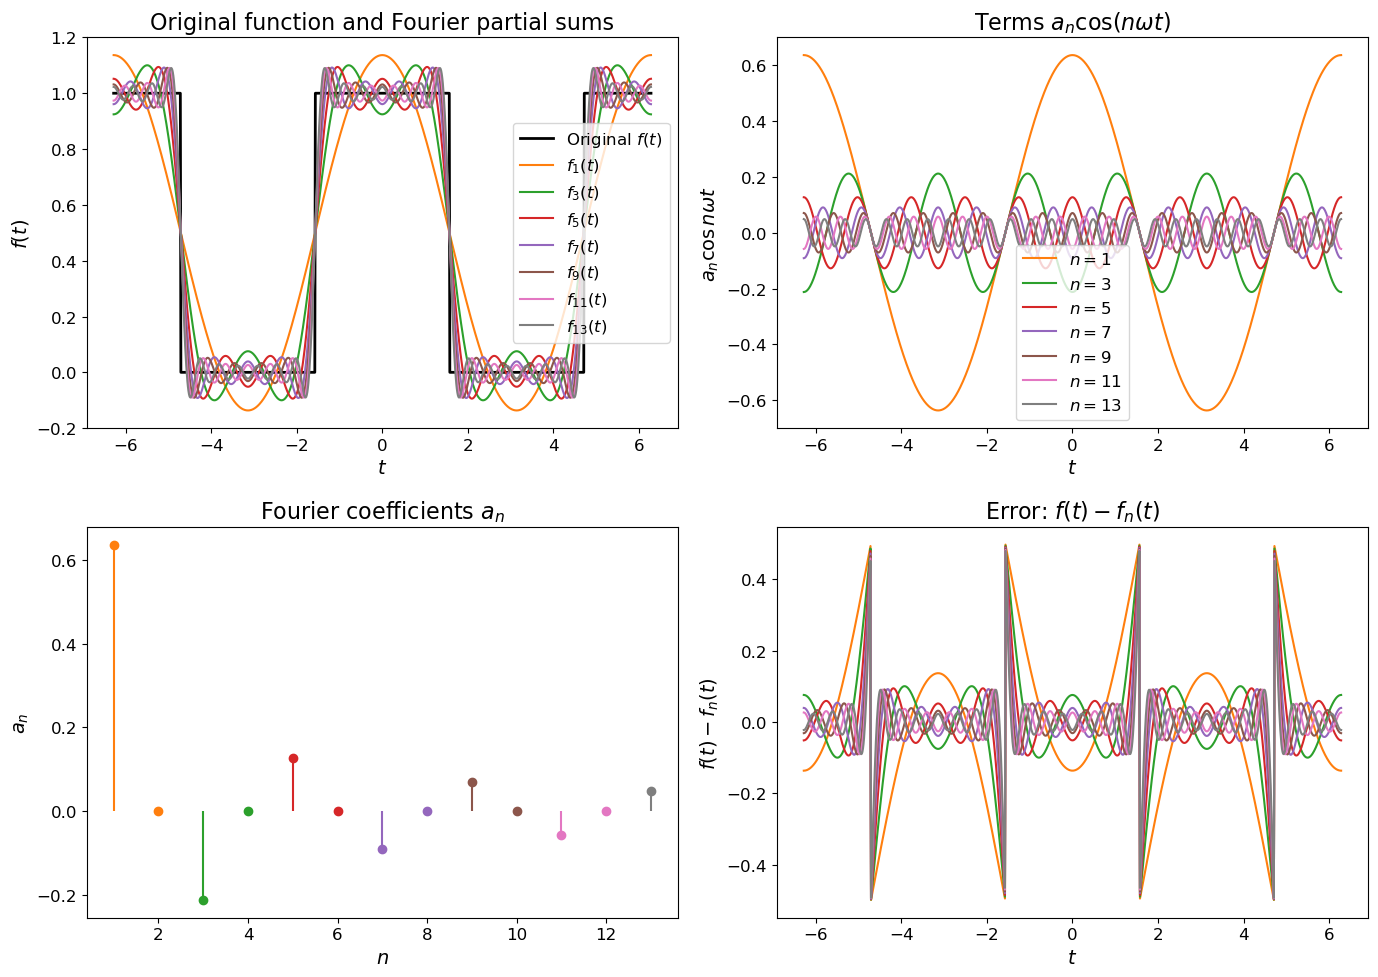

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the square window function (even, 50% duty cycle)
def square_window(t, T=2*np.pi):
    t_mod = (t + T/2) % T - T/2  # shifts to (-T/2, T/2]
    return np.where(np.abs(t_mod) < T/4, 1, 0)

# Fourier cosine coefficients a_n (only odd n ≠ 0)
def an(n, T=2*np.pi):
    if n % 2 == 0:
        return 0
    return (2 / (np.pi * n)) * (-1)**((n - 1)//2)

# Partial sum of the cosine Fourier series
def fourier_partial_sum(t, n_max, T=2*np.pi):
    omega = 2 * np.pi / T
    sum_series = 0.5 * np.ones_like(t)  # a_0 / 2 = 1/2
    for n in range(1, n_max + 1):
        a = an(n, T)
        sum_series += a * np.cos(n * omega * t)
    return sum_series

# Parameters
T = 2 * np.pi
t = np.linspace(-T, T, 1000)
nmax = 13
colors = plt.cm.tab10(np.arange(1, nmax + 1) % 10)

# Prepare figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10)) # 
axs = axs.flatten()

# Panel [0,0]: Original function and Fourier approximations
axs[0].plot(t, square_window(t, T), label='Original $f(t)$', color='black', linewidth=2)
for n in range(1, nmax + 1):
    if n % 2 == 1:
        axs[0].plot(t, fourier_partial_sum(t, n, T), label=f'$f_{{{n}}}(t)$', color=colors[(n - 1)//2])
axs[0].set_title('Original function and Fourier partial sums')
axs[0].legend()
axs[0].set_ylabel('$f(t)$')
axs[0].set_xlabel('$t$')

# Panel [0,1]: Individual terms a_n * cos(nωt)
omega = 2 * np.pi / T
for n in range(1, nmax + 1):
    if n % 2 == 1:
        a = an(n, T)
        axs[1].plot(t, a * np.cos(n * omega * t), label=f'$n={n}$', color=colors[(n - 1)//2])
axs[1].set_title('Terms $a_n \\cos(n\\omega t)$')
axs[1].legend()
axs[1].set_ylabel('$a_n\cos n\omega t$')
axs[1].set_xlabel('$t$')

# Panel [1,0]: Coefficient a_n as vertical bars with 'o'
for n in range(1, nmax + 1):
    a = an(n, T)
    axs[2].vlines(n, 0, a, color=colors[(n - 1)//2])
    axs[2].plot(n, a, 'o', color=colors[(n - 1)//2])
axs[2].set_title('Fourier coefficients $a_n$')
axs[2].set_xlabel('$n$')
axs[2].set_ylabel('$a_n$')

# Panel [1,1]: Error f(t) - f_n(t)
for n in range(1, nmax + 1):
    if n % 2 == 1:
        error = square_window(t, T) - fourier_partial_sum(t, n, T)
        axs[3].plot(t, error, label=f'$f(t)-f_{{{n}}}(t)$', color=colors[(n - 1)//2])
axs[3].set_title('Error: $f(t) - f_n(t)$')
axs[3].set_xlabel('$t$')
axs[3].set_ylabel('$f(t) - f_n(t)$')

fig.tight_layout()
fig.show()

# fig.savefig('fourier_series_square_wave.png', dpi=300)


## Example: Square Function


$$\begin{align}
f(t) &=
\begin{cases}
1 & \text{if } 0 \leq t < T/2, \\
-1 & \text{if } -T/2 \leq t < 0i.
\end{cases}\\
f(t+T)& = f(t)
\end{align}
$$

The Fourier series for this function contains only sine terms and is given by:

$$f_{2n+1}(t) = \sum_{\substack{k=0}}^{n} \frac{4}{(2k+1)\pi} \sin\left(\frac{2\pi (2k+1) t}{T}\right).$$


Below, we plot both the original function and its Fourier approximation for  $n_{\text{max}} = 5$ .


In [3]:

# TT = 1
# tt = np.linspace(0, TT, 100)

# nmax = 5
# a_n = np.zeros((nmax, 2))
# b_n = np.zeros((nmax, 2))
# sinn = np.zeros((nmax, len(tt)))



# for nn in range(nmax): 
#     sinn[nn,:] = np.sin(2 * np.pi * nn * tt / TT)
#     an[nn] = np.trapz(sinn[nn,:], tt) / TT
#     bn[nn] = np.trapz(sinn[nn,:] * np.cos(2 * np.pi * nn * tt / TT), tt) / TT

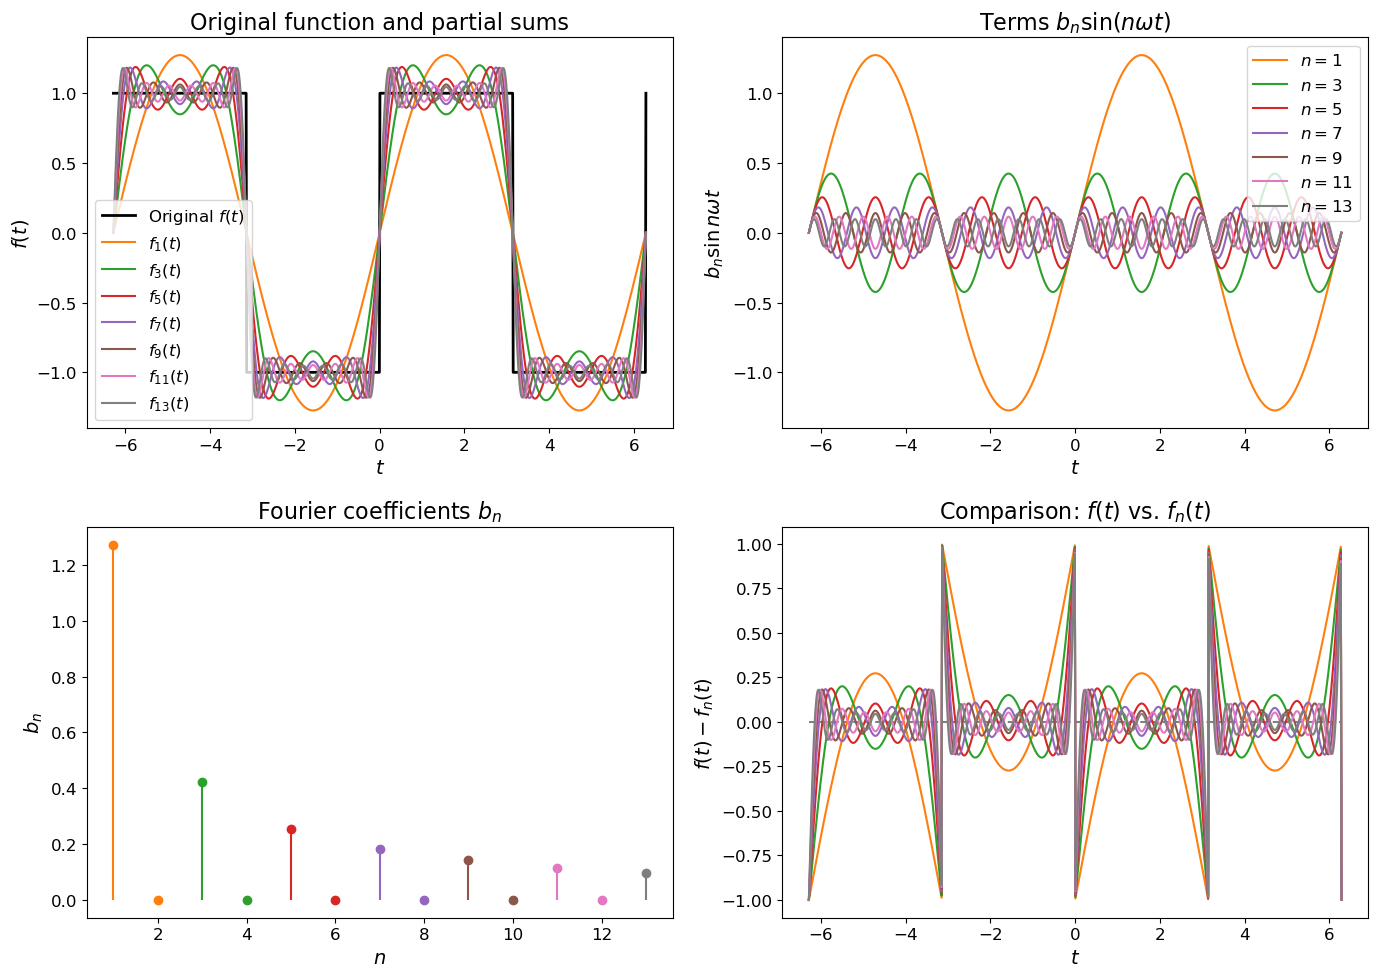

In [4]:


# Define the square wave function
def square_wave(t, T=2*np.pi):
    t_mod = np.mod(t + T/2, T) - T/2
    return np.where(t_mod < 0, -1, 1)

# Fourier coefficients for the square wave
def bn(n, A=4/np.pi):
    if n % 2 == 0:
        return 0
    return A / n 

# Partial sum of the Fourier series up to n
def fourier_partial_sum(t, n_max, T=2*np.pi):
    omega = 2 * np.pi / T
    sum_series = np.zeros_like(t)
    for n in range(1, n_max + 1):
        b = bn(n)
        sum_series += b * np.sin(n * omega * t)
    return sum_series

# Parameters
T = 2 * np.pi
t = np.linspace(-T, T, 1000)
nmax = 13
colors = plt.cm.tab10(np.arange(1, nmax + 1) % 10)

# Prepare figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Panel [0,0]: Original function and Fourier approximations
axs[0].plot(t, square_wave(t, T), label='Original $f(t)$', color='black', linewidth=2)
for n in range(1, nmax + 1):
    if n%2 == 1:
        axs[0].plot(t, fourier_partial_sum(t, n, T), label=f'$f_{{{n}}}(t)$', color=colors[(n-1)//2])
axs[0].set_title('Original function and partial sums')
axs[0].legend()
axs[0].set_ylabel('$f(t)$')
axs[0].set_xlabel('$t$')


# Panel [0,1]: Individual terms b_n * sin(nωt)
omega = 2 * np.pi / T
for n in range(1, nmax + 1):
    if n%2 == 1: 
        b = bn(n)
        axs[1].plot(t, b * np.sin(n * omega * t), label=f'$n={n}$', color=colors[(n-1)//2])
axs[1].set_title(r'Terms $b_n \sin(n\omega t)$')
axs[1].legend()
axs[1].set_ylabel(r'$b_n\sin n\omega t$')
axs[1].set_xlabel('$t$')

# Panel [1,0]: Coefficient b_n as vertical bars with 'o'
for n in range(1, nmax + 1):
    b = bn(n)
    axs[2].vlines(n, 0, b, color=colors[(n-1)//2])
    axs[2].plot(n, b, 'o', color=colors[(n-1)//2])
axs[2].set_title('Fourier coefficients $b_n$')
axs[2].set_xlabel('$n$')
axs[2].set_ylabel('$b_n$')

# Panel [1,1]: Plot f_n for n=0 and n=nmax
axs[3].plot(t, np.zeros_like(t), '--', label='$f_0(t) = 0$', color='gray')
# This line of code is plotting the partial sum of the Fourier series up to the maximum specified term `nmax` on the graph.
# axs[3].plot(t, fourier_partial_sum(t, nmax, T), label=f'$f_{{{nmax}}}(t)$', color='red')
for n in range(1, nmax + 1):
    if n%2 == 1: 
        axs[3].plot(t, fourier_partial_sum(t, n, T)-square_wave(t, T), label=f'$f(t)-f_{{{n}}}(t)$', color=colors[(n-1)//2])
# axs[3].plot(t, square_wave(t, T)-fourier_partial_sum(t, nmax, T), '--', label='$f(t)-f_n(t)$', color='black', linewidth=1)
axs[3].set_title(f'Comparison: $f(t)$ vs. $f_n(t)$')
# axs[3].legend()
axs[3].set_xlabel('$t$')
axs[3].set_ylabel('$f(t) - f_n(t)$')

plt.tight_layout()
plt.show()

# fig.savefig('fourier_series_square_wave_sin.png', dpi=300)


# Example: Linear Ramp

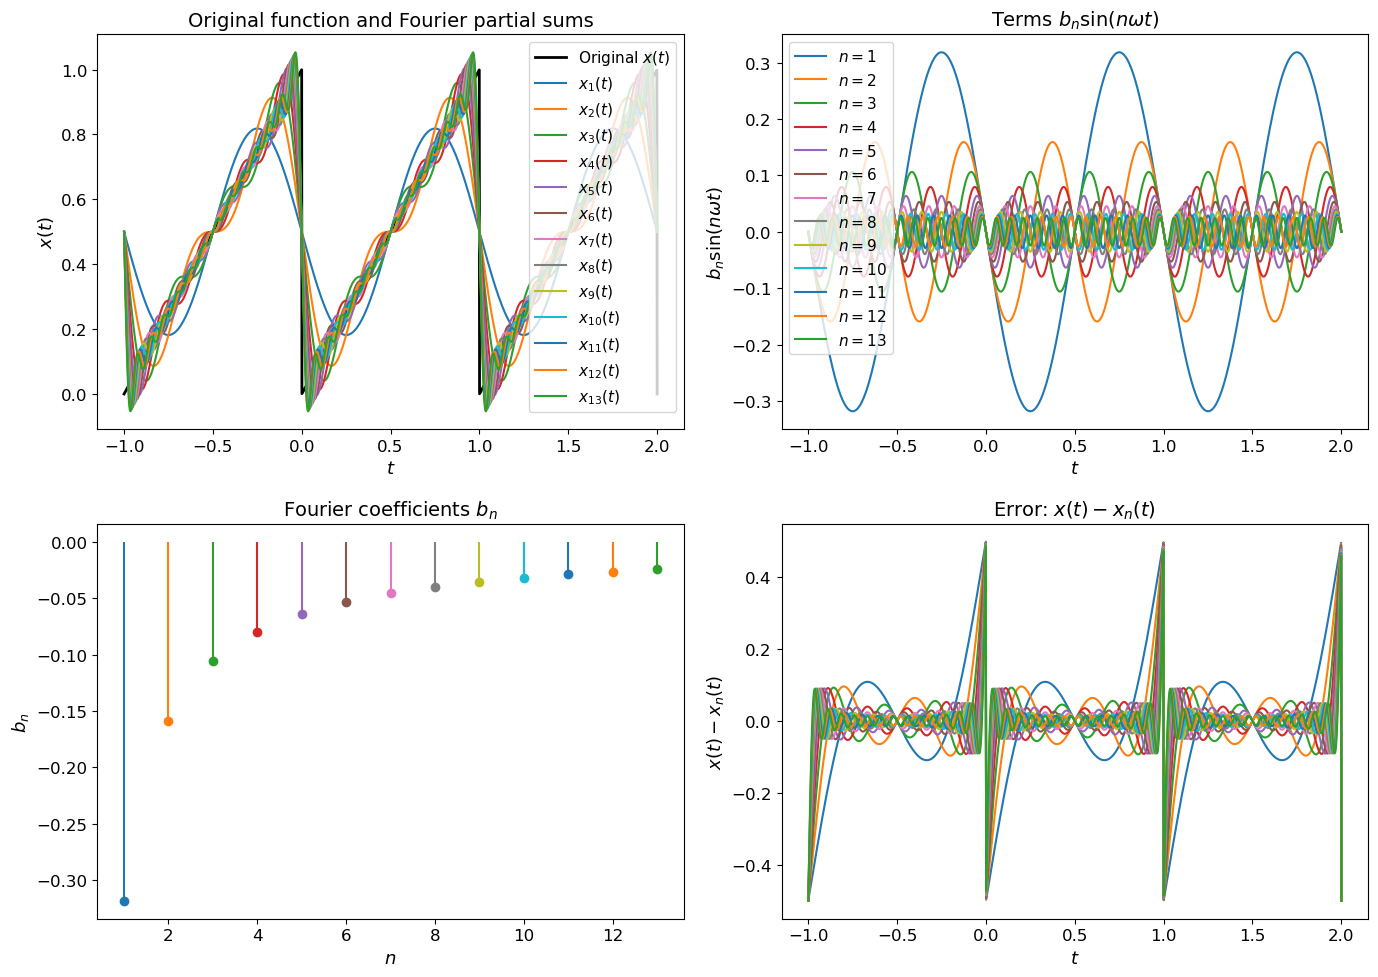

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1
A = 1
t = np.linspace(-T, 2*T, 2000)
nmax = 13
colors = plt.cm.tab10(np.arange(nmax) % 10)

# Original ramp function: defined on [0, T), extended periodically
def ramp_function(t, T=1, A=1):
    return A * ((t % T) / T)

# Fourier sine coefficients b_n = -A / (π n)
def bn(n, A=1):
    return -A / (np.pi * n)

# Fourier partial sum using sine terms only
def fourier_partial_sum(t, n_max, T=1, A=1):
    omega = 2 * np.pi / T
    result = A * np.ones_like(t) /2 # a0 = A, constant term
    for n in range(1, n_max + 1):
        result += bn(n, A) * np.sin(n * omega * t)
    return result

# Prepare figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Panel [0,0]: Original function and Fourier approximations
axs[0].plot(t, ramp_function(t, T, A), label='Original $x(t)$', color='black', linewidth=2)
for n in range(1, nmax + 1):
    axs[0].plot(t, fourier_partial_sum(t, n, T, A), label=f'$x_{{{n}}}(t)$', color=colors[(n - 1) % 10])
axs[0].set_title('Original function and Fourier partial sums', fontsize=14)
axs[0].legend(fontsize=11)
axs[0].set_xlabel('$t$', fontsize=13)
axs[0].set_ylabel('$x(t)$', fontsize=13)

# Panel [0,1]: Individual terms b_n * sin(nωt)
omega = 2 * np.pi / T
for n in range(1, nmax + 1):
    axs[1].plot(t, bn(n, A) * np.sin(n * omega * t), label=f'$n={n}$', color=colors[(n - 1) % 10])
axs[1].set_title('Terms $b_n \\sin(n\\omega t)$', fontsize=14)
axs[1].legend(fontsize=11)
axs[1].set_xlabel('$t$', fontsize=13)
axs[1].set_ylabel('$b_n\\sin(n\\omega t)$', fontsize=13)

# Panel [1,0]: Coefficients b_n
for n in range(1, nmax + 1):
    b = bn(n, A)
    axs[2].vlines(n, 0, b, color=colors[(n - 1) % 10])
    axs[2].plot(n, b, 'o', color=colors[(n - 1) % 10])
axs[2].set_title('Fourier coefficients $b_n$', fontsize=14)
axs[2].set_xlabel('$n$', fontsize=13)
axs[2].set_ylabel('$b_n$', fontsize=13)

# Panel [1,1]: Error f(t) - f_n(t)
for n in range(1, nmax + 1):
    error = ramp_function(t, T, A) - fourier_partial_sum(t, n, T, A)
    axs[3].plot(t, error, label=f'$x(t)-x_{{{n}}}(t)$', color=colors[(n - 1) % 10])
axs[3].set_title('Error: $x(t) - x_n(t)$', fontsize=14)
axs[3].set_xlabel('$t$', fontsize=13)
axs[3].set_ylabel('$x(t) - x_n(t)$', fontsize=13)

fig.tight_layout()
# fig.savefig('fourier_series_ramp.png', dpi=300)
plt.show()


## Example: inverse

/var/folders/2y/kd_y0jvx5tn8ln5xjpbct0680000gn/T/ipykernel_96926/1061037957.py:8: RuntimeWarning: divide by zero encountered in divide
  A = 1/ np.sqrt(np.arange(n)) * noise
/var/folders/2y/kd_y0jvx5tn8ln5xjpbct0680000gn/T/ipykernel_96926/1061037957.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(['$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])


[ 0.          0.05791405 -0.01283983  0.0814182  -0.01872358  0.01230724
 -0.03922264  0.0142465   0.00118224  0.02268557 -0.04944211 -0.01708658
 -0.00699025]


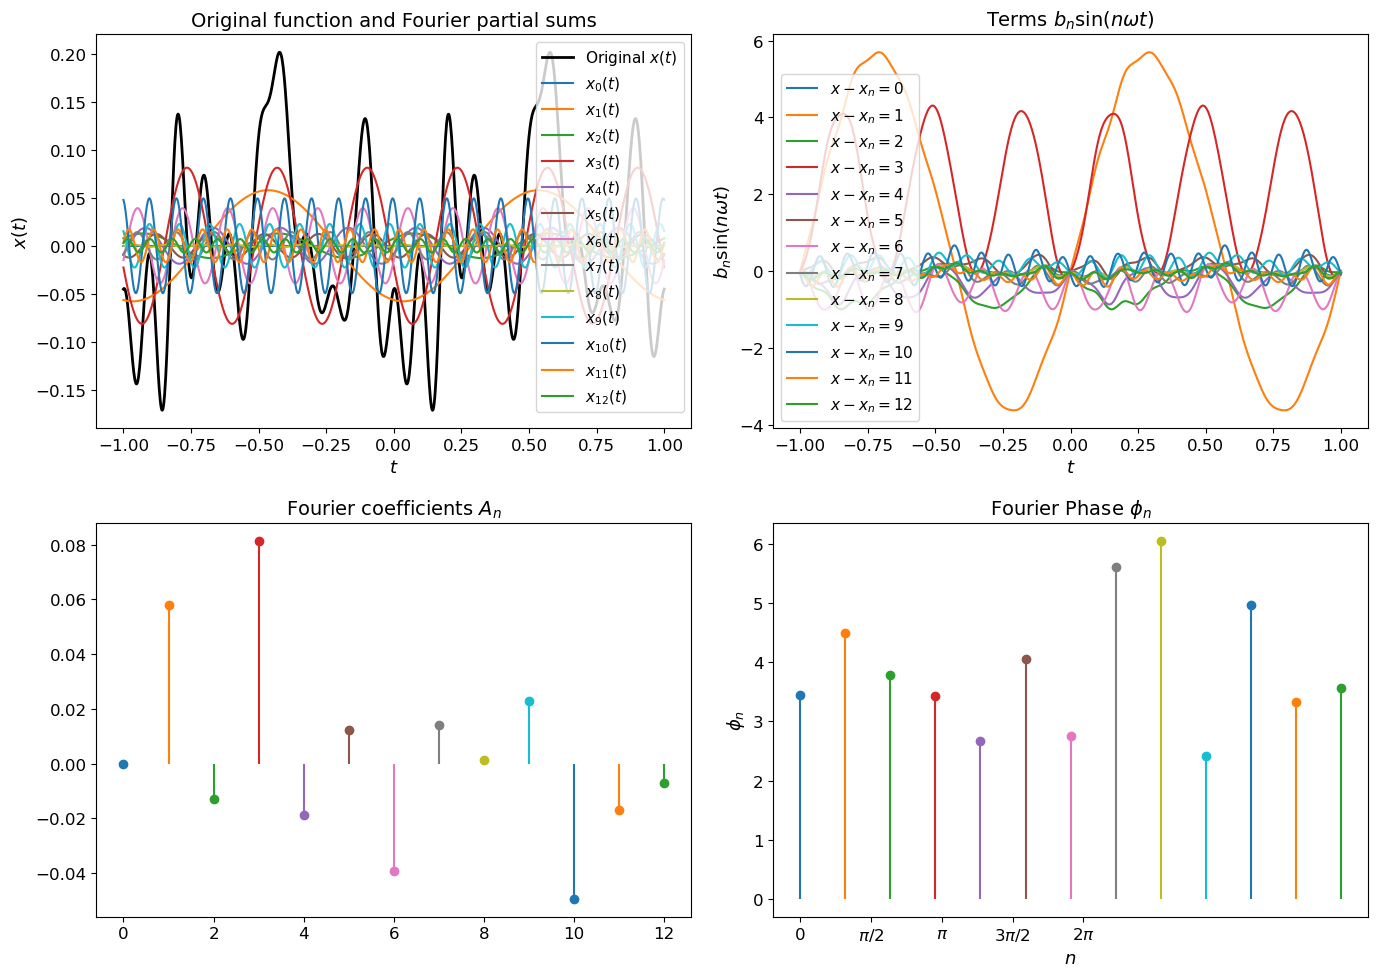

In [27]:
seed = 0
r = np.random.RandomState(seed)
n = 13

phi = r.uniform(0, 2*np.pi, n)
sigma = 0.1
noise = r.normal(0, sigma, n)
A = 1/ np.sqrt(np.arange(n)) * noise
A[0] = 0
print (A)

omega = 2 * np.pi / T
t = np.linspace(-T, T, 1000)
x = np.zeros_like(t)
xi  = np.zeros((n, len(t)))
for i in range(n):
    xi[i] = A[i] * np.sin(i*omega * t + phi[i])
    x += xi[i]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()
axs[0].plot(t, x, label='Original $x(t)$', color='black', linewidth=2)
for i in range(n):
    axs[0].plot(t, xi[i], label=f'$x_{{{i}}}(t)$', color=colors[i % 10])
axs[0].set_title('Original function and Fourier partial sums', fontsize=14)
axs[0].legend(fontsize=11)
axs[0].set_xlabel('$t$', fontsize=13)
axs[0].set_ylabel('$x(t)$', fontsize=13)
# Panel [0,1]: Individual terms b_n * sin(nωt)
for i in range(n):
    axs[1].plot(t, x-xi[i,:].cumsum(axis=0), label=f'$x-x_n={i}$', color=colors[i % 10])
axs[1].set_title('Terms $b_n \\sin(n\\omega t)$', fontsize=14)
axs[1].legend(fontsize=11)
axs[1].set_xlabel('$t$', fontsize=13)
axs[1].set_ylabel('$b_n\\sin(n\\omega t)$', fontsize=13)
# Panel [1,0]: Coefficients b_n
for i in range(n):
    axs[2].vlines(i, 0, A[i], color=colors[i % 10])
    axs[2].plot(i, A[i], 'o', color=colors[i % 10])
axs[2].set_title('Fourier coefficients $A_n$', fontsize=14)        

# axs[3].plot(t, x, label='Original $x(t)$', color='black', linewidth=2)
for i in range(n):
    axs[3].vlines(i, 0, phi[i], color=colors[i % 10])
    axs[3].plot(i, phi[i], 'o', color=colors[i % 10])
axs[3].set_ylabel('$\\phi_n$', fontsize=13)
axs[3].set_title('Fourier Phase $\\phi_n$', fontsize=14)
axs[3].set_xlabel('$n$', fontsize=13)
axs[3].set_xticklabels(['$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
axs[3].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
fig.tight_layout()

# Heat Equation

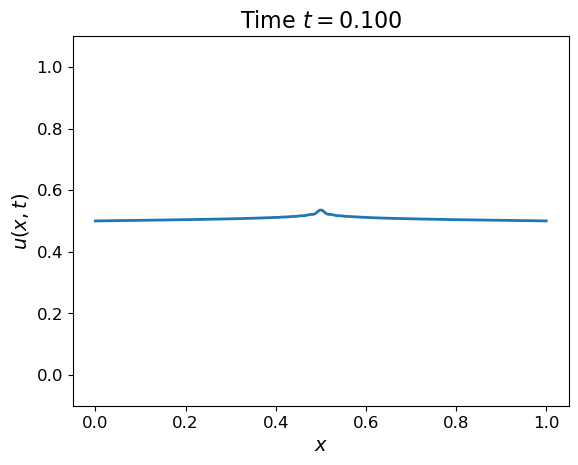

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
L = 1.0              # Length of the rod
T_H = 1.0            # Hot temperature
T_C = 0.0            # Cold temperature
alpha = 1.0          # Thermal diffusivity
Nx = 200             # Number of spatial points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Initial condition
u0 = np.where(x < L/2, T_H, T_C)

# Fourier series parameters
N = 100              # Number of Fourier modes
nframes = 200        # Number of frames in animation
t_max = 0.1          # Maximum time to display
ts = np.linspace(0, t_max, nframes)

def u_xt(x, t, N=100):
    result = np.zeros_like(x)
    for n in range(1, N + 1):
        k = 2 * np.pi / L
        # Fourier coefficient from integration of piecewise function
        bn = 2 * (T_H - T_C) / (n * np.pi) * np.sin(n * np.pi / 2)
        term = bn * np.sin(n * k * x/2) * np.exp(-alpha * k**2 * t)
        result += term
    return (T_C + T_H)/2 + result

# Setup figure
fig, ax = plt.subplots()
line, = ax.plot(x, u0, lw=2)
ax.set_ylim(T_C - 0.1, T_H + 0.1)
ax.set_xlabel('$x$')
ax.set_ylabel('$u(x,t)$')
ax.set_title('Heat Equation: Step Initial Condition')

def update(frame):
    t = ts[frame]
    u = u_xt(x, t, N=N)
    line.set_ydata(u)
    ax.set_title(f'Time $t = {t:.3f}$')
    return line,

ani = FuncAnimation(fig, update, frames=nframes, interval=30, blit=True)

# To save:
ani.save("heat_step.gif", fps=30)
ani.save("heat_step.avi", fps=30)

plt.show()
# 

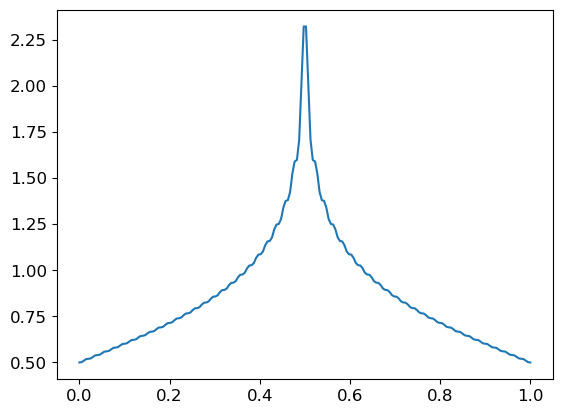

In [34]:
fix, ax = plt.subplots()
ax.plot(x,u_xt(x,0))

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# # Time parameters
# T = 2 * np.pi
# omega = 2 * np.pi / T
# t = np.linspace(0, T, 1000)

# # Define a sample function: square wave
# def f_square(t):
#     return np.where((t % T) < T / 2, 1, -1)

# # Compute real Fourier coefficients
# def compute_real_coeffs(f, T, N):
#     a = np.zeros(N+1)
#     b = np.zeros(N+1)
#     for n in range(N+1):
#         a[n] = (2/T) * np.trapz(f(t) * np.cos(n * omega * t), t)
#         b[n] = (2/T) * np.trapz(f(t) * np.sin(n * omega * t), t)
#     return a, b

# # Compute complex Fourier coefficients
# def compute_complex_coeffs(f, T, N):
#     c = np.zeros(2*N+1, dtype=complex)
#     n_vals = np.arange(-N, N+1)
#     for i, n in enumerate(n_vals):
#         c[i] = (1/T) * np.trapz(f(t) * np.exp(-1j * n * omega * t), t)
#     return n_vals, c

# # Parameters
# N = 10
# a_n, b_n = compute_real_coeffs(f_square, T, N)
# n_vals, c_n = compute_complex_coeffs(f_square, T, N)

# # Plot
# fig = plt.figure(figsize=(12, 4))
# gs = GridSpec(1, 2, width_ratios=[2, 2])

# # Real Coefficients
# ax0 = fig.add_subplot(gs[0])
# ax0.stem(range(N+1), a_n, linefmt='tab:blue', markerfmt='bo', basefmt=' ')
# ax0.stem(range(N+1), b_n, linefmt='tab:orange', markerfmt='o', basefmt=' ')
# ax0.set_title('Real Fourier Coefficients $a_n$ and $b_n$')
# ax0.set_xlabel('$n$')
# ax0.set_ylabel('Amplitude')
# ax0.legend(['$a_n$', '$b_n$'])

# # Complex Coefficients
# ax1 = fig.add_subplot(gs[1])
# # ax1.stem(n_vals, np.abs(c_n), linefmt='tab:green', markerfmt='go', basefmt=' ')
# ax1.set_title('Complex Fourier Coefficients $|c_n|$')
# ax1.set_xlabel('$n$')
# ax1.set_ylabel('$|c_n|$')

# plt.tight_layout()
# plt.show()

# fig.savefig('fourier_series_square_wave.png', dpi=300)

## Animation

In [7]:
# # Re-import required libraries after kernel reset
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# # Define the square wave function
# def square_wave(t, T=2*np.pi):
#     t_mod = np.mod(t + T/2, T) - T/2
#     return np.where(t_mod < 0, -1, 1)

# # Fourier coefficients for the square wave
# def bn(n, A=1):
#     if n % 2 == 0:
#         return 0
#     return 4 * A / (n * np.pi)

# # Partial sum of the Fourier series up to n
# def fourier_partial_sum(t, n_max, T=2*np.pi):
#     omega = 2 * np.pi / T
#     sum_series = np.zeros_like(t)
#     for n in range(1, n_max + 1):
#         b = bn(n)
#         sum_series += b * np.sin(n * omega * t)
#     return sum_series

# # Parameters
# T = 2 * np.pi
# t = np.linspace(-T, T, 1000)
# nmax = 9
# colors = plt.cm.tab10(np.arange(1, nmax + 1) % 10)

# # Create figure and axis for animation
# fig, ax = plt.subplots(figsize=(8, 4))
# line_f, = ax.plot([], [], lw=2)
# line_approx, = ax.plot([], [], lw=2)
# text_n = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# ax.set_xlim(t[0], t[-1])
# ax.set_ylim(-1.5, 1.5)
# ax.set_title('Fourier Series Approximation of a Square Wave')
# ax.grid(True)
# line_f.set_data(t, square_wave(t, T))
# line_f.set_color('black')
# line_f.set_label('Original $f(t)$')
# line_approx.set_label('$f_n(t)$')
# ax.legend(loc='upper right')

# def init():
#     line_approx.set_data([], [])
#     text_n.set_text('')
#     return line_approx, text_n

# def animate(n):
#     fn = fourier_partial_sum(t, n + 1, T)
#     line_approx.set_data(t, fn)
#     line_approx.set_color(colors[n % 10])
#     text_n.set_text(f'$n = {n + 1}$')
#     return line_approx, text_n

# ani = animation.FuncAnimation(fig, animate, frames=nmax, init_func=init,
#                               blit=True, interval=800, repeat=True)

# # Save as animated gif
# gif_path = "/mnt/data/fourier_square_wave.gif"
# ani.save(gif_path, writer='pillow', fps=1)

# gif_path
